# CDC: Monkeypox visualizations

#### Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_grid as altgrid
from altair_saver import save

In [3]:
alt.themes.register("grid", altgrid.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()
alt.renderers.enable("altair_saver", fmts=["vega-lite", "png"])

RendererRegistry.enable('altair_saver')

In [5]:
today = pd.Timestamp.now(tz="America/Los_Angeles").strftime("%Y-%m-%d")
time = pd.Timestamp.now(tz="America/Los_Angeles").strftime("%-I:%M %p")

---

## Cases timeseries

In [13]:
src = pd.read_csv(
    "https://raw.githubusercontent.com/gridviz/monkeypox/main/data/processed/monkeypox_cases_derived_timeseries_latest.csv"
)

In [14]:
src.head()

,date,cases,cumulative_sum
0,2022-08-07,0,7507
1,2022-08-06,408,7507
2,2022-08-05,483,7099
3,2022-08-03,229,6616
4,2022-08-02,516,6387


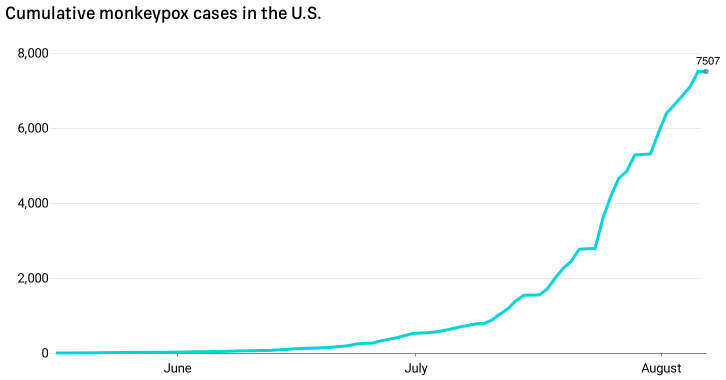

In [35]:
line = (
    alt.Chart(src)
    .mark_line()
    .encode(
        x=alt.X("date:T", axis=alt.Axis(tickCount=5), title=""),
        y=alt.Y("cumulative_sum:Q", title=" ", axis=alt.Axis(tickCount=5)),
    )
    .properties(title="Cumulative monkeypox cases in the U.S.", width=650, height=300)
)

text = (
    alt.Chart(src.query("(cumulative_sum == cumulative_sum.max()) & (cases > 0)"))
    .mark_text(dy=-10, dx=10)
    .encode(
        x=alt.X("date:T"),
        y=alt.Y("cumulative_sum:Q"),
        text=alt.Text("cumulative_sum:Q"),
    )
)

circle = (
    alt.Chart(src.query("(date == date.max())"))
    .mark_circle()
    .encode(
        x=alt.X("date:T"),
        y=alt.Y("cumulative_sum:Q"),
    )
)

(line + text + circle).configure_legend(symbolType="stroke", orient="top")

In [16]:
line.save("visuals/trendline.png")